# Analise Exploratória dos dados

O estudo de procução de vinhos vai começar pela sua produção, preparando a base para juntas às outras

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [157]:
producao_arquivo = r'/home/eugenio/Documentos/Pos/PosTechDataScience_Fiap/Grupo_posFiap/bases/vinho/Producao/Producao.csv'
df_producao_origin = pd.read_csv(producao_arquivo, sep=';')
df_producao_origin['id_produto'] = df_producao_origin['id'].astype(str) + '-' + df_producao_origin['produto']
df_producao_origin.head()

,id,produto,1970,1971,1972,1973,1974,1975,1976,1977,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,id_produto
0,1,VINHO DE MESA,217208604,154264651,146953297,116710345,193875345,177401209,144565438,195359778,...,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611,1-VINHO DE MESA
1,2,Tinto,174224052,121133369,118180926,88589019,146544484,144274134,118360170,154801826,...,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214,2-Tinto
2,3,Branco,748400,1160500,1812367,243900,4138768,1441507,1871473,4954387,...,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430,3-Branco
3,4,Rosado,42236152,31970782,26960004,27877426,43192093,31685568,24333795,35603565,...,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968,4-Rosado
4,5,VINHO FINO DE MESA (VINÍFERA),23899346,23586062,21078771,12368410,31644124,39424590,34500590,41264971,...,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796,5-VINHO FINO DE MESA (VINÍFERA)


In [158]:
df_producao_colunas = ['1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022']

In [159]:
df_producao_anual = df_producao_origin.reset_index().melt(id_vars='id_produto', value_vars=df_producao_colunas)
df_producao_anual.columns = ['produto', 'ano', 'valor']
df_producao_anual.head(10)

,produto,ano,valor
0,1-VINHO DE MESA,1970,217208604
1,2-Tinto,1970,174224052
2,3-Branco,1970,748400
3,4-Rosado,1970,42236152
4,5-VINHO FINO DE MESA (VINÍFERA),1970,23899346
5,6-Tinto,1970,7591557
6,7-Branco,1970,15562889
7,8-Rosado,1970,744900
8,9-SUCO,1970,1097771
9,10-Suco de uva integral,1970,1097771


In [161]:
lista_produtos = df_producao_anual['produto'].unique()
lista_produtos

array(['1-VINHO DE MESA', '2-Tinto', '3-Branco', '4-Rosado',
       '5-VINHO FINO DE MESA (VINÍFERA)', '6-Tinto', '7-Branco',
       '8-Rosado', '9-SUCO', '10-Suco de uva integral',
       '11-Suco de uva concentrado', '12-Suco de uva adoçado',
       '13-Suco de uva orgânico', '14-Suco de uva reconstituído',
       '15-DERIVADOS', '16-Espumante', '17-Espumante moscatel',
       '18-Base espumante', '19-Base espumante moscatel',
       '20-Base Champenoise champanha', '21-Base Charmat champanha',
       '22-Bebida de uva', '23-Polpa de uva', '24-Mosto simples',
       '25-Mosto concentrado', '26-Mosto de uva com bagaço',
       '27-Mosto dessulfitado', '28-Mistelas', '29-Néctar de uva',
       '30-Licorosos', '31-Compostos', '32-Jeropiga', '33-Filtrado',
       '34-Frisante', '35-Vinho leve', '36-Vinho licoroso', '37-Brandy',
       '38-Destilado', '39-Bagaceira', '40-Licor de bagaceira',
       '41-Vinagre', '42-Borra líquida', '43-Borra seca',
       '44-Vinho Composto', '45-Pisco', 

## Separando os tipos de vinhos produzidos

Pensando nos tipos de Produtos que há para importação e exportação, avaliaremos os seguintes tipos:

* Vinho de Mesa
* Suco
* Espumantes
* Uvas/ Frescas

Vinho de Mesa

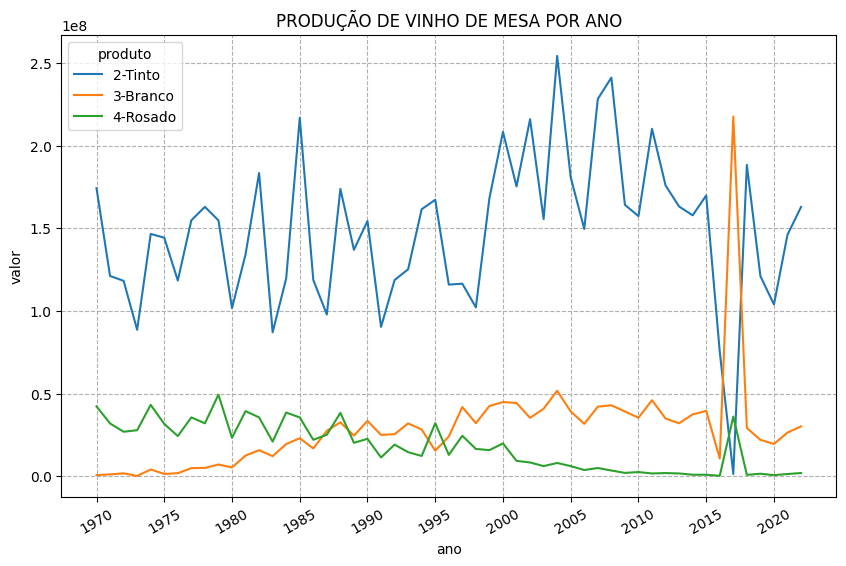

In [164]:
vinho_mesa = ['2-Tinto', '3-Branco', '4-Rosado']
producao_vinho_mesa = df_producao_anual.query("produto in @vinho_mesa")
plt.figure(figsize=(10,6))
plt.title('PRODUÇÃO DE VINHO DE MESA POR ANO')
axis = sns.lineplot(data= producao_vinho_mesa, x="ano", y="valor", hue="produto")
axis.xaxis.set_major_locator(ticker.IndexLocator(base=5, offset=0))
plt.xticks(rotation=30)
plt.grid(linestyle='--')
plt.show()

Vinho de Mesa Vinífera

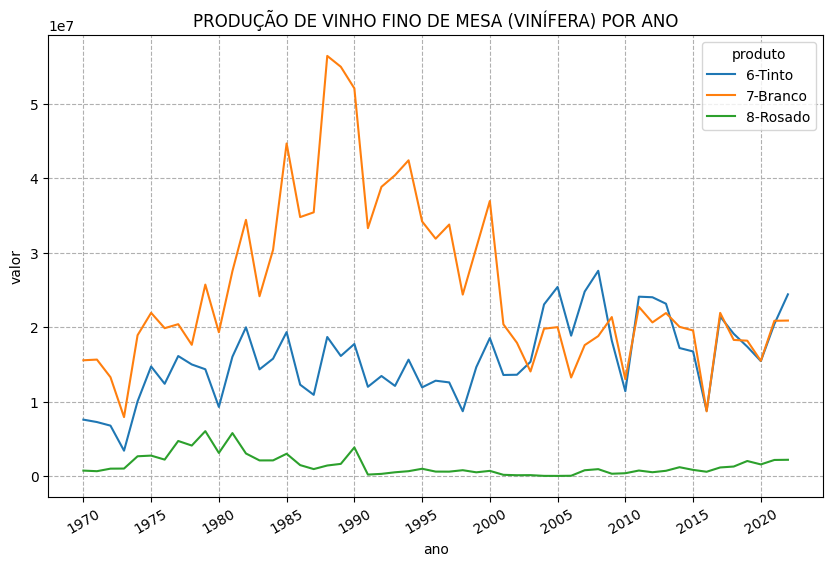

In [166]:
vinho_mesa_vinifera = ['6-Tinto', '7-Branco', '8-Rosado']
producao_vinho_mesa_vinifera = df_producao_anual.query("produto in @vinho_mesa_vinifera")
plt.figure(figsize=(10,6))
plt.title('PRODUÇÃO DE VINHO FINO DE MESA (VINÍFERA) POR ANO')
axis = sns.lineplot(data= producao_vinho_mesa_vinifera, x="ano", y="valor", hue="produto")
axis.xaxis.set_major_locator(ticker.IndexLocator(base=5, offset=0))
plt.xticks(rotation=30)
plt.grid(linestyle='--')
plt.show()

Comparação entre o Vinho de mesa Tradicional e o Vinífera

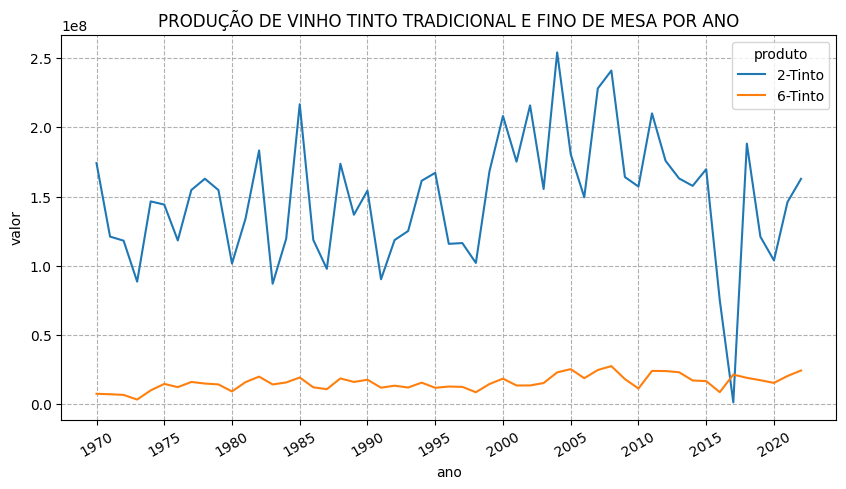

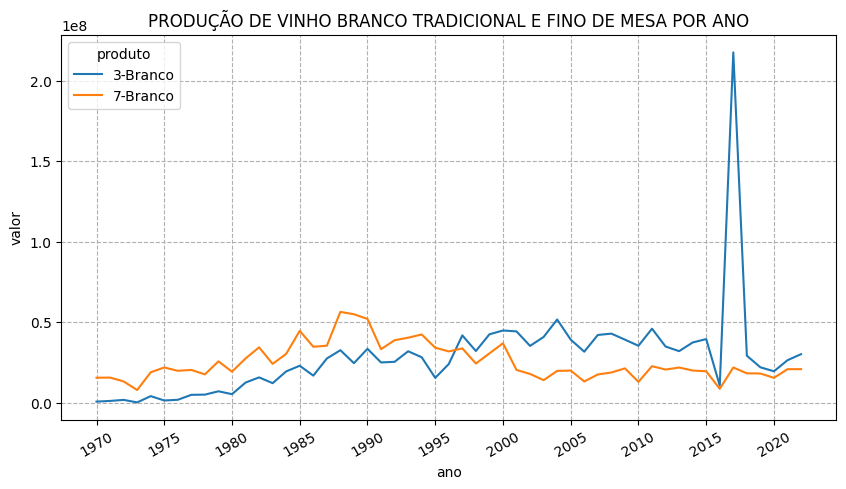

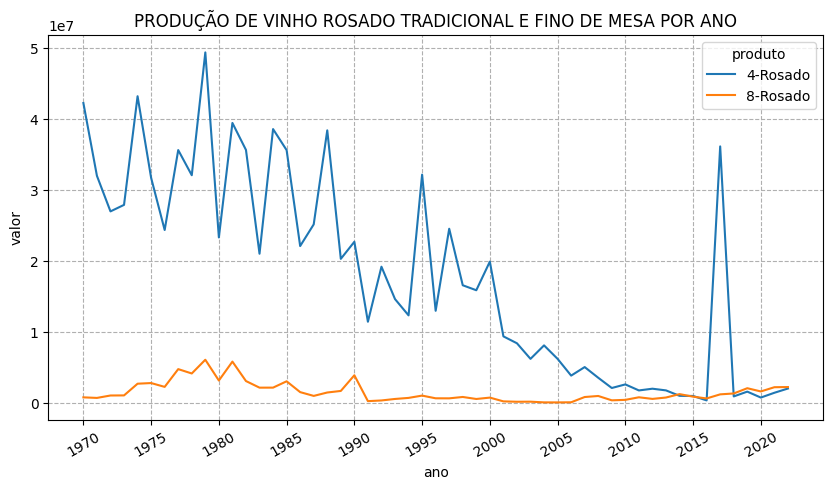

In [175]:
vinho_tinto = ['2-Tinto', '6-Tinto']
producao_vinho_tinto = df_producao_anual.query("produto in @vinho_tinto")
plt.figure(figsize=(10,5))
plt.title('PRODUÇÃO DE VINHO TINTO TRADICIONAL E FINO DE MESA POR ANO')
axis = sns.lineplot(data= producao_vinho_tinto, x="ano", y="valor", hue="produto")
axis.xaxis.set_major_locator(ticker.IndexLocator(base=5, offset=0))
plt.xticks(rotation=30)
plt.grid(linestyle='--')
plt.show()

vinho_branco = ['3-Branco', '7-Branco']
producao_vinho_branco = df_producao_anual.query("produto in @vinho_branco")
plt.figure(figsize=(10,5))
plt.title('PRODUÇÃO DE VINHO BRANCO TRADICIONAL E FINO DE MESA POR ANO')
axis = sns.lineplot(data= producao_vinho_branco, x="ano", y="valor", hue="produto")
axis.xaxis.set_major_locator(ticker.IndexLocator(base=5, offset=0))
plt.xticks(rotation=30)
plt.grid(linestyle='--')
plt.show()

vinho_rosado = ['4-Rosado', '8-Rosado']
producao_vinho_rosado = df_producao_anual.query("produto in @vinho_rosado")
plt.figure(figsize=(10,5))
plt.title('PRODUÇÃO DE VINHO ROSADO TRADICIONAL E FINO DE MESA POR ANO')
axis = sns.lineplot(data= producao_vinho_rosado, x="ano", y="valor", hue="produto")
axis.xaxis.set_major_locator(ticker.IndexLocator(base=5, offset=0))
plt.xticks(rotation=30)
plt.grid(linestyle='--')
plt.show()

